# CEE 690, Lecture 10 Code Examples

This course will make use of notebook style coding.  Notebooks are incredibly useful tools both for teaching and for disseminating data anlysis.

This is a partial set of codes to look at multiclass regression and show a few results.  This produces the results mentioned in lecture 10.

## Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

This section provides some initialization commands, which can simply be copied for assignments.

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# We need to import key libraries that we're going to use.  
# For now this is just numpy, which is our linear algebra library
import numpy as np

Setting the random seed for code reproducibility.

In [2]:
# to make this notebook's output stable across runs, we are going to see the random seed
np.random.seed(42)

Note that we have to reset the random seed _every_ time we run an algorithm if we want the same results!

We also want to set up a plotting environment and make it look pretty.  For those of you familiar with matlab, we will be using matplotlib which is fairly close in syntax and feel.  It's not too far off from R either.

In [3]:
# To plot pretty figures
import matplotlib.pyplot as plt
%matplotlib inline 
# This command figures show up in the notebook.  It's a "magic" command...
# Typically, this now happens by default so it is often an unnecessary command, but is good for standardization.
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

These commands will help us save figures; not going to go through them so much.

In [4]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
PROJECT_SAVE_DIR = "10"

In [5]:
# makes the directory if it doesn't exist.
import os
if not (os.path.isdir(PROJECT_ROOT_DIR+'/'+PROJECT_SAVE_DIR)):
    print('Figure directory didn\'t exist, creating now.')
    os.mkdir(PROJECT_ROOT_DIR+'/'+PROJECT_SAVE_DIR)
else:
    print('Figure directory exists.') 

Figure directory exists.


In [6]:
# a simple defined helper function.
def savepdf(fig,name):
    fig.savefig(PROJECT_ROOT_DIR+'/'+PROJECT_SAVE_DIR+'/'+name+'.pdf')

## Load in MNIST as an example

In [7]:
from sklearn.datasets import fetch_openml
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [8]:
X.shape

(70000, 784)

In [9]:
y.shape

(70000,)

In [10]:
from sklearn import model_selection,linear_model

In [11]:
X_train,X_valid,y_train,y_valid=model_selection.train_test_split(X,y)

## Fit multiple logistic regression to MNIST
This section defines logistic regression and fits both types of multi-class models to the data.  The optimization here has been limited to make the results faster.

In [12]:
# Fit with 'auto,' which will perform softmax regression
cls=linear_model.LogisticRegression(solver='sag',multi_class='auto',max_iter=10,C=.1)
cls.fit(X,y)

/Users/dec18/anaconda/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='sag',
          tol=0.0001, verbose=0, warm_start=False)

In [13]:
# Fit explicitly with one-versus-rest
cls_ovr=cls=linear_model.LogisticRegression(solver='sag',multi_class='ovr',max_iter=10,C=.1)
cls_ovr.fit(X,y)

/Users/dec18/anaconda/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10, multi_class='ovr', n_jobs=None,
          penalty='l2', random_state=None, solver='sag', tol=0.0001,
          verbose=0, warm_start=False)

#### Visualize Filters and Validation Performance

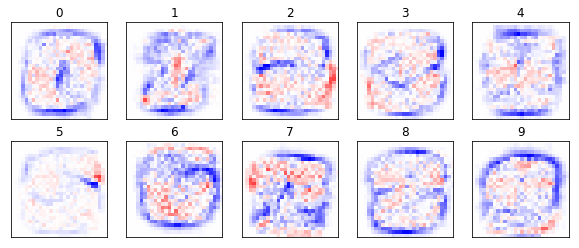

In [14]:
# From the softmax
W=cls.coef_
fig=plt.figure(figsize=[10,4])
for i,w in enumerate(W):
    ax=plt.subplot(2,5,i+1)
    maxabs=np.max(np.abs(w))
    plt.xticks([])
    plt.yticks([])
    plt.title('{}'.format(str(i)))
    img=ax.imshow(w.reshape(28,28),cmap='bwr',vmax=maxabs,vmin=-maxabs)
savepdf(fig,'filters')

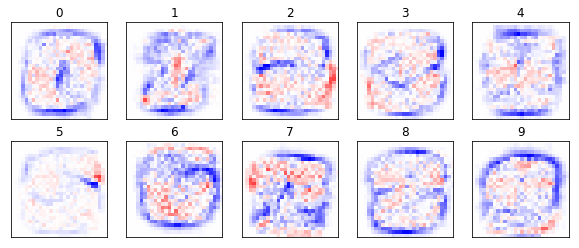

In [15]:
# from the ovr
W=cls_ovr.coef_
fig=plt.figure(figsize=[10,4])
for i,w in enumerate(W):
    ax=plt.subplot(2,5,i+1)
    maxabs=np.max(np.abs(w))
    plt.xticks([])
    plt.yticks([])
    plt.title('{}'.format(str(i)))
    ax.imshow(w.reshape(28,28),cmap='bwr',vmax=maxabs,vmin=-maxabs)
savepdf(fig,'filters_ovr')

#### Performance Metrics

In [16]:
from sklearn import metrics

In [17]:
print('the accuracy is {}'.format(metrics.accuracy_score(y_valid,cls.predict(X_valid))))
print('the balanced accuracy is {}'.format(metrics.balanced_accuracy_score(y_valid,cls.predict(X_valid))))

the accuracy is 0.9222285714285714
the balanced accuracy is 0.9208573146946419


In [18]:
# this is a complicated function that is useful for showing confusion matricies.  
# feel free to use it, but we're not going to go through how it works.
from sklearn import metrics
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True                          ):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    ##
    modified by dec18

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    fig=plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title+', Accuracy={:.2f}'.format(accuracy))
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=0)
        plt.yticks(tick_marks, target_names)
    
    cmr=cm;
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cmr.max() / 1.5 if normalize else cmr.max() / 1.5
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cmr[i, j] > thresh else "black",fontsize=14)
        else:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cmr[i, j] > thresh else "black",fontsize=14)


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    #plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    return fig

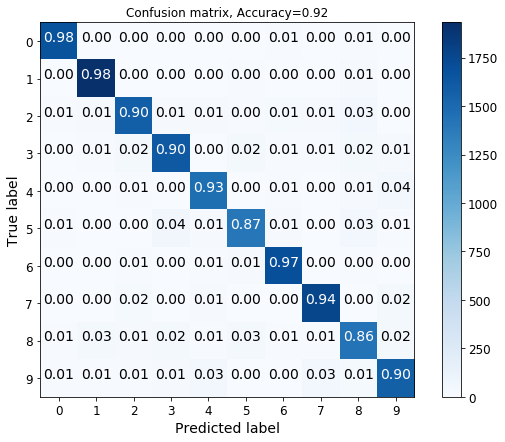

In [19]:
# Extract the predicted classes on the validation dataset
y_predicted=cls.predict(X_valid)
# Show the confusion matrix
cm = metrics.confusion_matrix(y_valid, y_predicted)
fig=plot_confusion_matrix(cm,['0','1','2','3','4','5','6','7','8','9'])
savepdf(fig,'conf_mat')

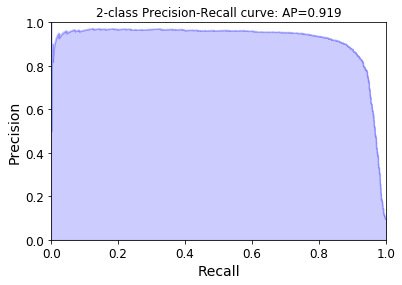

In [20]:
from sklearn.utils.fixes import signature
fig=plt.figure(figsize=[6,4])

k=5

average_precision = metrics.average_precision_score(y_valid==str(k),cls.predict_proba(X_valid)[:,k])
precision, recall, _ = metrics.precision_recall_curve(y_valid==str(k),cls.predict_proba(X_valid)[:,k])

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.00])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.3f}'.format(
          average_precision))
savepdf(fig,'pr_curve')